<a href="https://colab.research.google.com/github/shiftsolve/Activities_/blob/master/week6_XGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

Load Data

In [0]:
data = pd.read_csv('census.csv')

# **View Data**

In [3]:
data.head(2)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K


In [4]:
data.shape

(45222, 14)

In [5]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


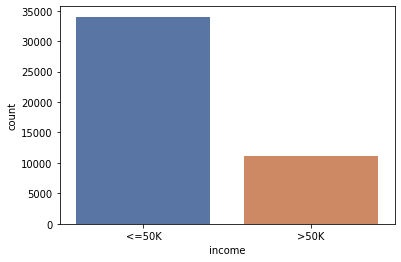

In [6]:
sns.countplot(x='income',data=data,palette='deep')

# **Prepare Data for Model**

Write list of features we want to use

In [0]:
features = ['workclass', 'education_level', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


Set Dummies

In [0]:
x_temp = data[features]
X = pd.get_dummies(x_temp)

In [0]:
#y = data['income']
data['stat'] = [ 0 if x =='<=50K' else 1 for x in data['income']]
y = data['stat']

# **Without SMOTE  - - Training a Model**

Train - Test Split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [0]:
#Initializing a model
model = XGBClassifier()


In [12]:
# Fit the Model
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
#Prediction
y_pred = model.predict(X_test)

## Metrics

In [14]:
#Confusion Matrix
cf = metrics.confusion_matrix(y_test, y_pred)
cf

array([[12938,   698],
       [ 1843,  2610]])

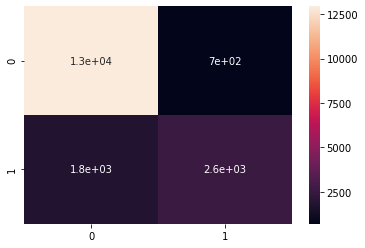

In [15]:
# heatmap of confusion matrix 
sns.heatmap(cf, annot = True)

In [16]:
#Accuracy >>> Of all the predictions, how many are correct

acc = model.score(X_test,y_test)
acc 

0.8595278898778264

In [17]:
# Other formula for acc

metrics.accuracy_score(y_test, y_pred)

0.8595278898778264

In [19]:
#Precision >>> how many from the predicted are relevant

precision = metrics.precision_score(y_test , y_pred )

# means '>50K' is positive 1 
precision

0.7889963724304716

In [21]:
#Recall >>> How many relevant items were selected

recall = metrics.recall_score(y_test, y_pred )
# means '>50K' is positive 1

recall

0.5861217156972828

In [22]:
cf


array([[12938,   698],
       [ 1843,  2610]])

In [23]:
precision

0.7889963724304716

In [24]:
recall

0.5861217156972828

# ROC ( Receiver Operating Characteristic)

plot if the True positive rate vs False positive rate. 
Shows trade off between SENSITIVTY (True positive rate) and SPECIFICITY (True negative rate)


ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.


https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/



In [0]:
#calculate the ROC Curve Without SMOTE
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

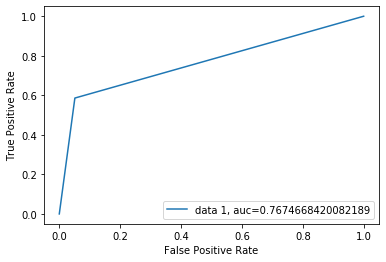

In [26]:
plt.plot(fpr, tpr,  label = "data 1, auc=" +str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# With SMOTE

In [27]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(X,y)

In [29]:
print(X_res.shape[0] - X.shape[0], 'new random picked points')

22806 new random picked points


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.4, random_state = 42)

In [31]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred = model.predict(X_test)

In [33]:
metrics.confusion_matrix(y_test, y_pred)

array([[11002,  2593],
       [ 1247, 12370]])

In [34]:
metrics.accuracy_score(y_test, y_pred)

0.858885785682787

In [36]:
metrics.precision_score(y_test , y_pred )

0.8267058744904097

In [38]:

metrics.recall_score(y_test, y_pred)

0.9084232944113975

In [0]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

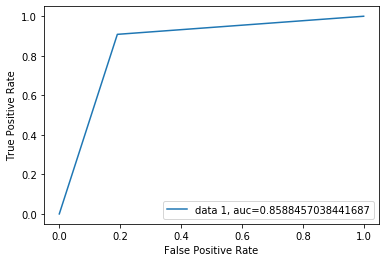

In [40]:
plt.plot(fpr, tpr, label = "data 1, auc=" +str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()